In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
features = pd.read_csv('features.csv.zip')
train = pd.read_csv('train.csv.zip')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv.zip')
sample_submission = pd.read_csv('sampleSubmission.csv.zip')

In [3]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
sample_submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


### Observations:

<ul>This is supervised learning regression problem.
<li>Training data has 421570 rows.</li>
<li>Test data has 115064 rows.</li>

<li>Training data has 5 columns:</li>
<ol>
<li>Store - the store number</li>
<li>Dept - the department number</li>
<li>Date - the week</li>
<li>Weekly_Sales - sales for the given department in the given store</li>
<li>IsHoliday - whether the week is a special holiday week</li>
</ol>
    
<li>features data has 12 columns:</li>
<ol>
<li>Store - the store number</li>
<li>Date - the week</li>
<li>Temperature - average temperature in the region</li>
<li>Fuel_Price - cost of fuel in the region</li>
<li>MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.</li>
<li>CPI - the consumer price index</li>
<li>Unemployment - the unemployment rate</li>
<li>IsHoliday - whether the week is a special holiday week</li>
    </ol>
   
<li>store data has 3 columns:</li>
 <ol>
<li>Store</li>
<li>Size</li>
<li>Type</li>
    </ol>   
<li>The test set has all columns from training set except sales column.</li>
<li>The submission file has Id & Weekly_Sales for each test_sample.</li>
</ul>


### Basic information about the training set ###

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [12]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [13]:
train.Date.min(),train.Date.max()

('2010-02-05', '2012-10-26')

Observations:
* No. of rows 421570 as expected.
* No missing data.
* `Store` ranges from 1 to 45.
* `Dept` ranges from 1 to 99.
* `Date`ranges from 05 Fab 2010 to 26 Oct 2012.
* `weekly_Sales` ranges from -`$4988 ` to `$693099`.
We may need to deal with outliers and data entry error before we train our model.

### Basic information about the test set

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [17]:
test.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [18]:
test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [19]:
test.Date.min(),test.Date.max()

('2012-11-02', '2013-07-26')

Observations:
* No. of rows 115064 as expected.
* No missing data.
* `Store` ranges from 1 to 45
* `Dept` ranges from 1 to 99.
* `date` ranges from 02 Nov 2012 to 26 July 2013.


Here, we will join the stores and features on the basis of Store number.

In [22]:
dataset = train.merge(stores, how='left',on=['Store']).merge(features, how='left',on=['Store','Date','IsHoliday'])

In [23]:
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
421566,45,98,2012-10-05,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
421567,45,98,2012-10-12,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667
421568,45,98,2012-10-19,760.01,False,B,118221,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667


### Test data

### In this section, we will prepared the Test Dataset.

In [25]:
test_dataset = test.merge(stores, how='left',on=['Store']).merge(features, how='left',on=['Store','Date','IsHoliday'])

In [26]:
test_dataset.describe()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000
mean,22.238207,44.339524,136497.688921,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733
std,12.809930,30.656410,61106.926438,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427
min,1.000000,1.000000,34875.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000
25%,11.000000,18.000000,93638.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000
50%,22.000000,37.000000,140167.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000
75%,33.000000,74.000000,202505.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000
max,45.000000,99.000000,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


#### Extract parts of the date
* Year
* Week 
* Month
* Day

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [29]:
dataset['Year'] = pd.to_datetime(dataset['Date']).dt.year
dataset['Month'] = pd.to_datetime(dataset['Date']).dt.month
dataset['Week'] = pd.to_datetime(dataset['Date']).dt.isocalendar().week

In [30]:
test_dataset['Year'] = pd.to_datetime(test_dataset['Date']).dt.year
test_dataset['Month'] = pd.to_datetime(test_dataset['Date']).dt.month
test_dataset['Week'] = pd.to_datetime(test_dataset['Date']).dt.isocalendar().week

### Exploratory Data Analysis & Visualization

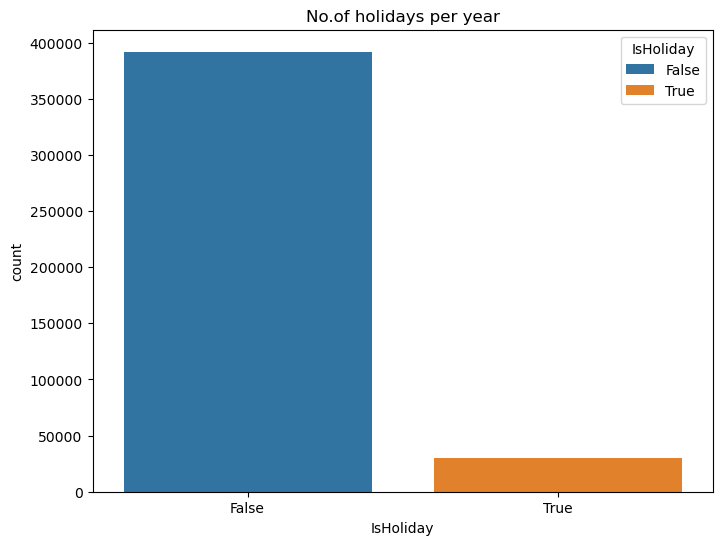

In [32]:
dataset['IsHoliday'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data= dataset, x = 'IsHoliday',  hue = 'IsHoliday')
plt.title("No.of holidays per year")
plt.show()


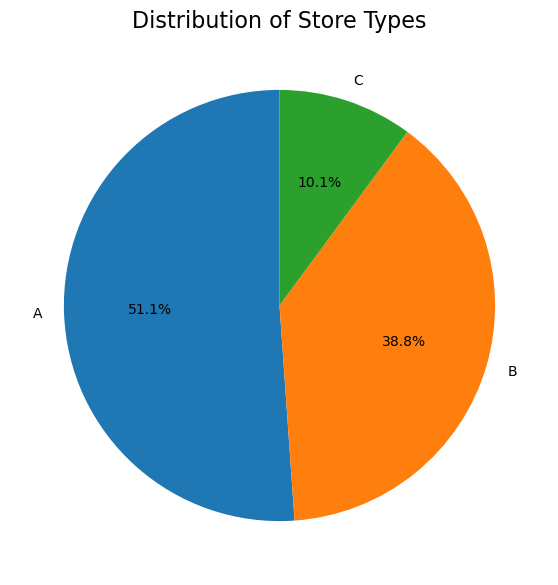

In [65]:
# Types of store
store_types = dataset['Type'].value_counts(dropna=False)

plt.figure(figsize=(7, 7))
plt.pie(store_types, labels=store_types.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Store Types', fontsize=16)
plt.show()

### It's evident that there are three categories of stores, with the A category being the present more than 50 % of total type.
###  Temperature

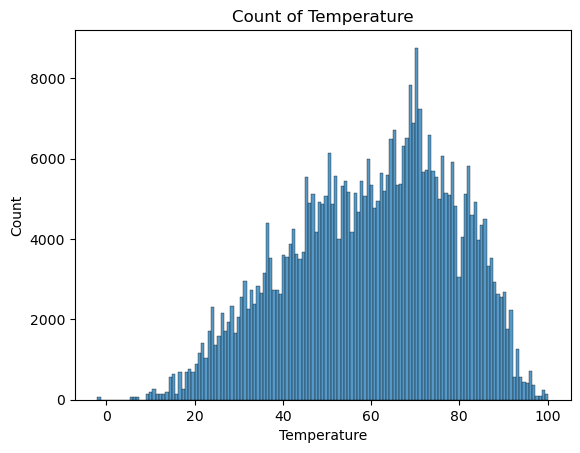

In [68]:
sns.histplot(data=dataset,x='Temperature')
plt.title('Count of Temperature');

### Fuel Price

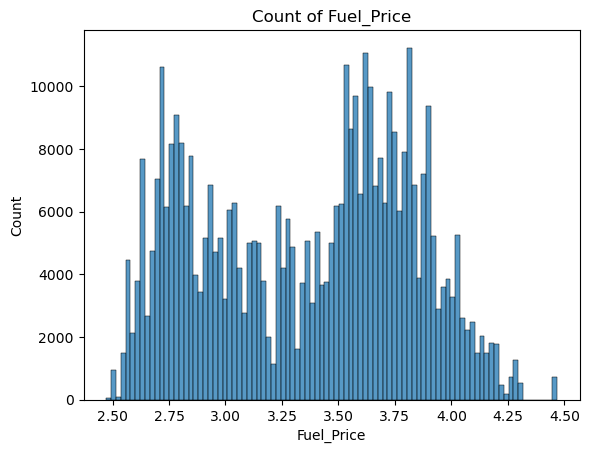

In [72]:
sns.histplot(data=dataset,x='Fuel_Price')
plt.title('Count of Fuel_Price');

### CPI

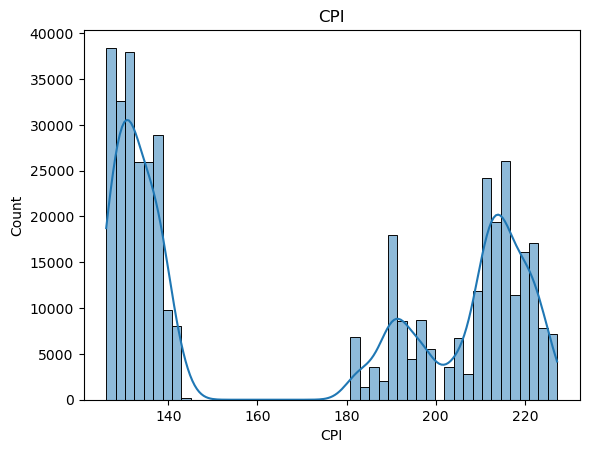

In [77]:
sns.histplot(data=dataset,x='CPI',kde=True)
plt.title('CPI');

### CPI value is varies from 120-220, but there is no value for 140-180
### Unemployment

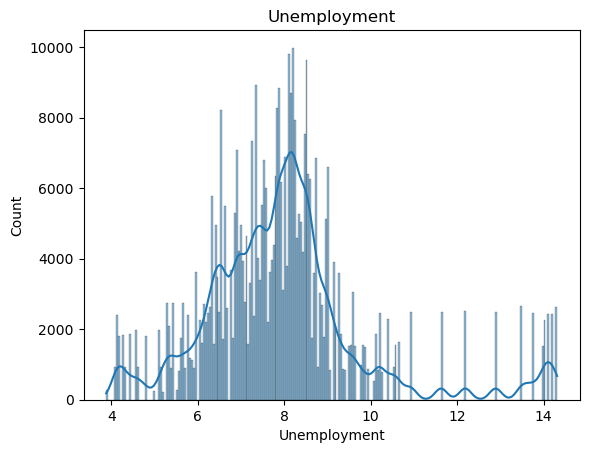

In [80]:
sns.histplot(data=dataset,x='Unemployment',kde=True)
plt.title('Unemployment');

#### Size of store

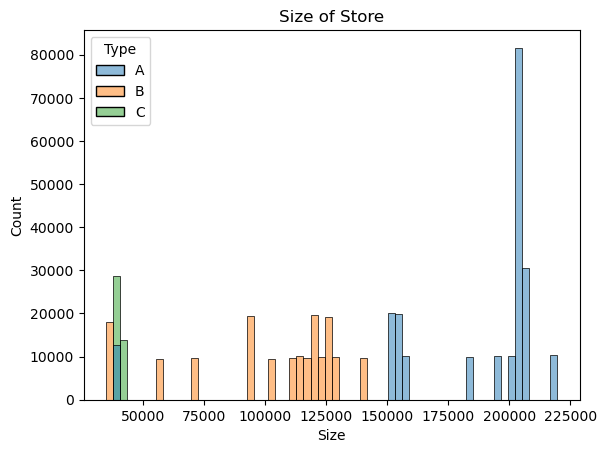

In [85]:
sns.histplot(data= dataset, x='Size',hue="Type")
plt.title("Size of Store");

### Insight`: There are three types of stores - A, B, and C, with the A category being both the most prevalent and the largest in size.

####  Weekly Sales vs Temperature

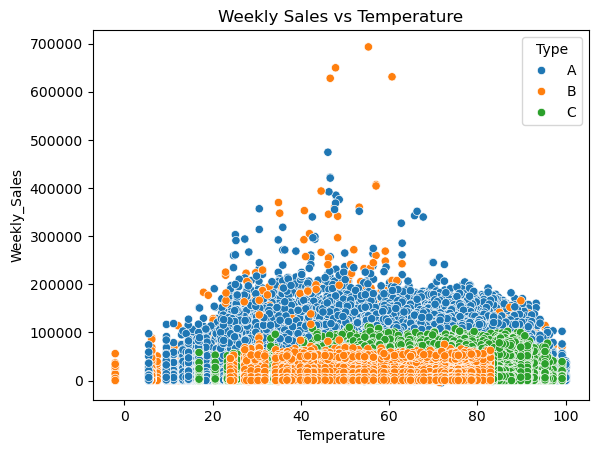

In [92]:
sns.scatterplot(data= dataset, x='Temperature', y='Weekly_Sales',hue='Type')
plt.title('Weekly Sales vs Temperature');


### Insight`:There appears to be some correlation between temperature and weekly sales, as lower temperatures are associated with some higher ticket of  weekly sales.
#### Weekly Sales vs Fuel Price

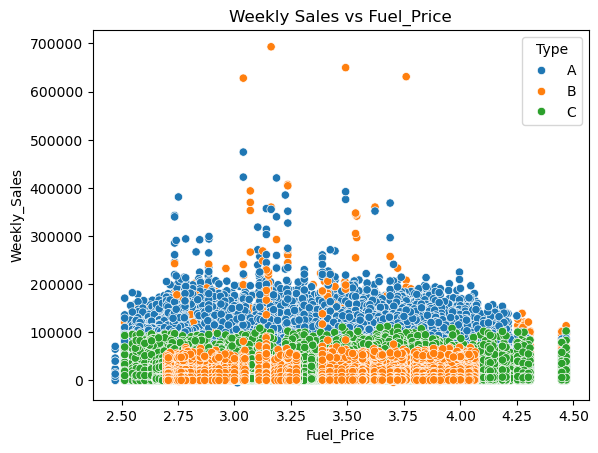

In [97]:
sns.scatterplot(data= dataset, x='Fuel_Price', y='Weekly_Sales',hue='Type')
plt.title('Weekly Sales vs Fuel_Price');

### ` Insight ` There appears to be no correlation between the fuel cost and weekly sales, but there is a significant correlation between weekly sales and the year. 
## Correlation

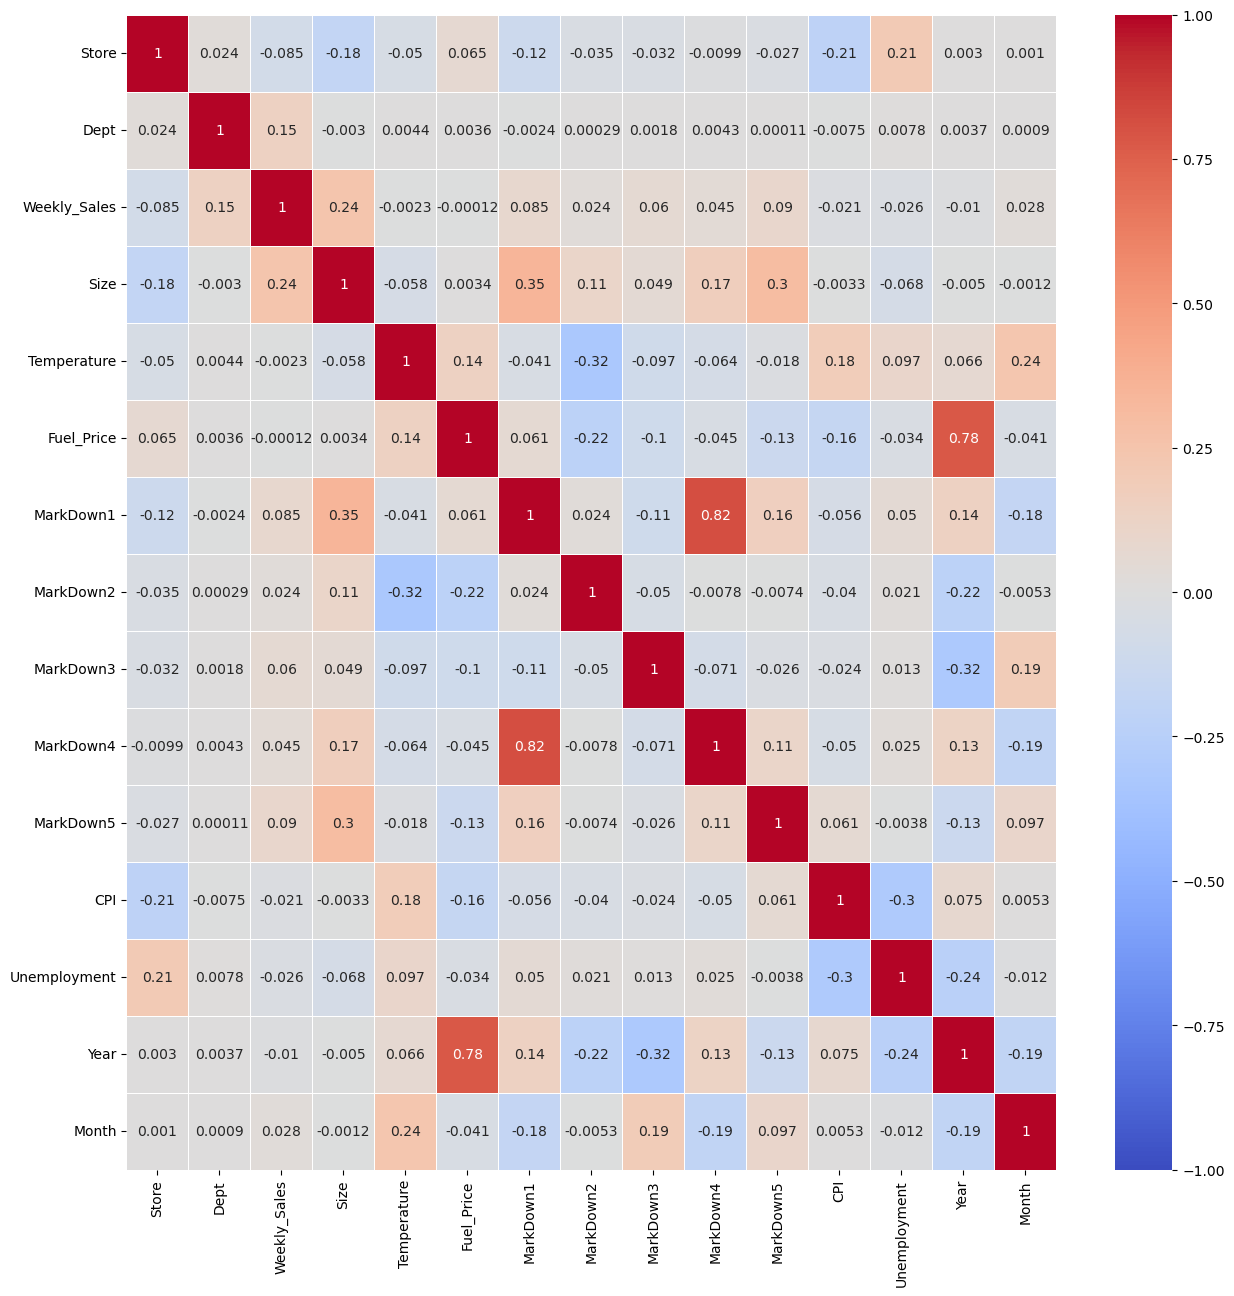

In [103]:
numeric_data = dataset.select_dtypes(include=[float, int])

corr = numeric_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.show()

From the above plot we can see that:

 - Dept and Size has maximum correlation on the Weekly Sales values
 -  MarkDown1 and MarkDown5 has some impact on the Weekly Sales

#### 1. What is the effect of the size of a store on its weekly sales?

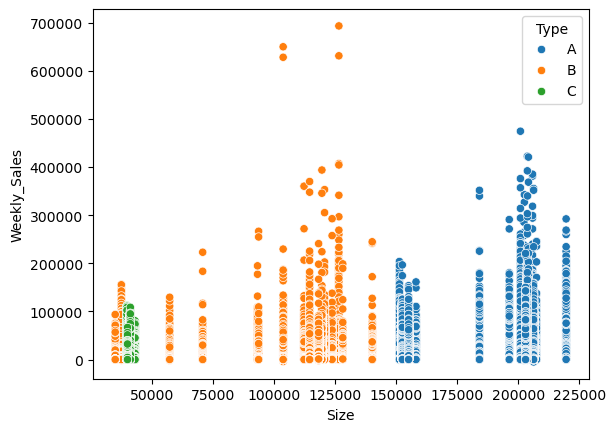

In [107]:
sns.scatterplot(data= dataset, y='Weekly_Sales', x='Size', hue=dataset['Type'])
plt.show()

### Insight: As the size of store increases sales also increases we can see three clusters means Size of store depend upon Type of store ###
### Which month has the highest sales?  ###

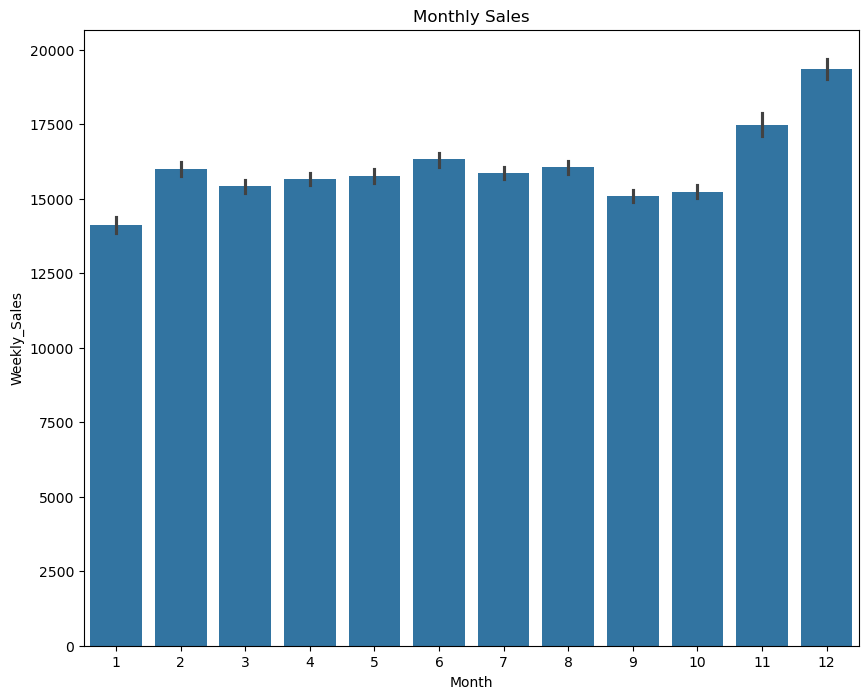

In [112]:
plt.figure(figsize =(10,8))
sns.barplot(data= dataset, y='Weekly_Sales', x='Month')
plt.title('Monthly Sales')
plt.show()

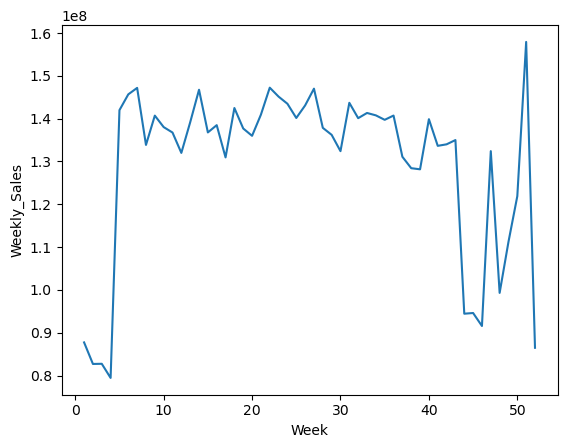

In [116]:
dataset_week = dataset.groupby("Week").sum() 
sns.lineplot(data=dataset_week,x=dataset_week.index,y='Weekly_Sales');

### Insight In the month of December, which is a holiday month for Christmas, the weekly sales show an increase. Throughout the year, the sales remain relatively stable, except for a decline around week 42, followed by a recovery during the holiday season. ###

### Does the department have any influence on weekly sales? ###

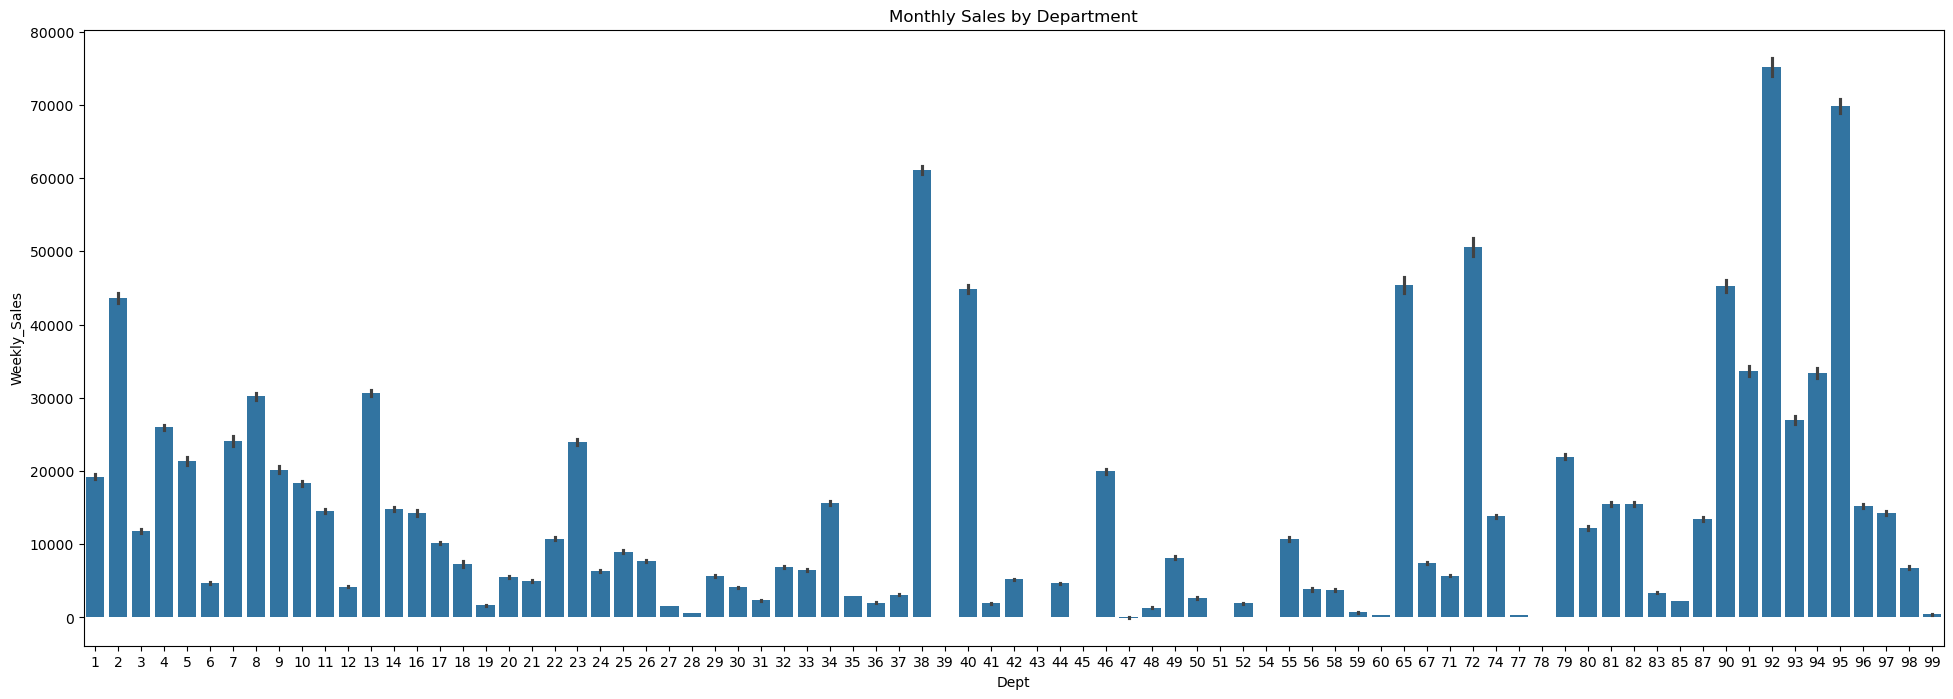

In [119]:
plt.figure(figsize =(24,8))
sns.barplot(data = dataset, x ='Dept', y ='Weekly_Sales')
plt.title('Monthly Sales by Department')
plt.show()

### `Insight` Some departments contribute to higher weekly sales.

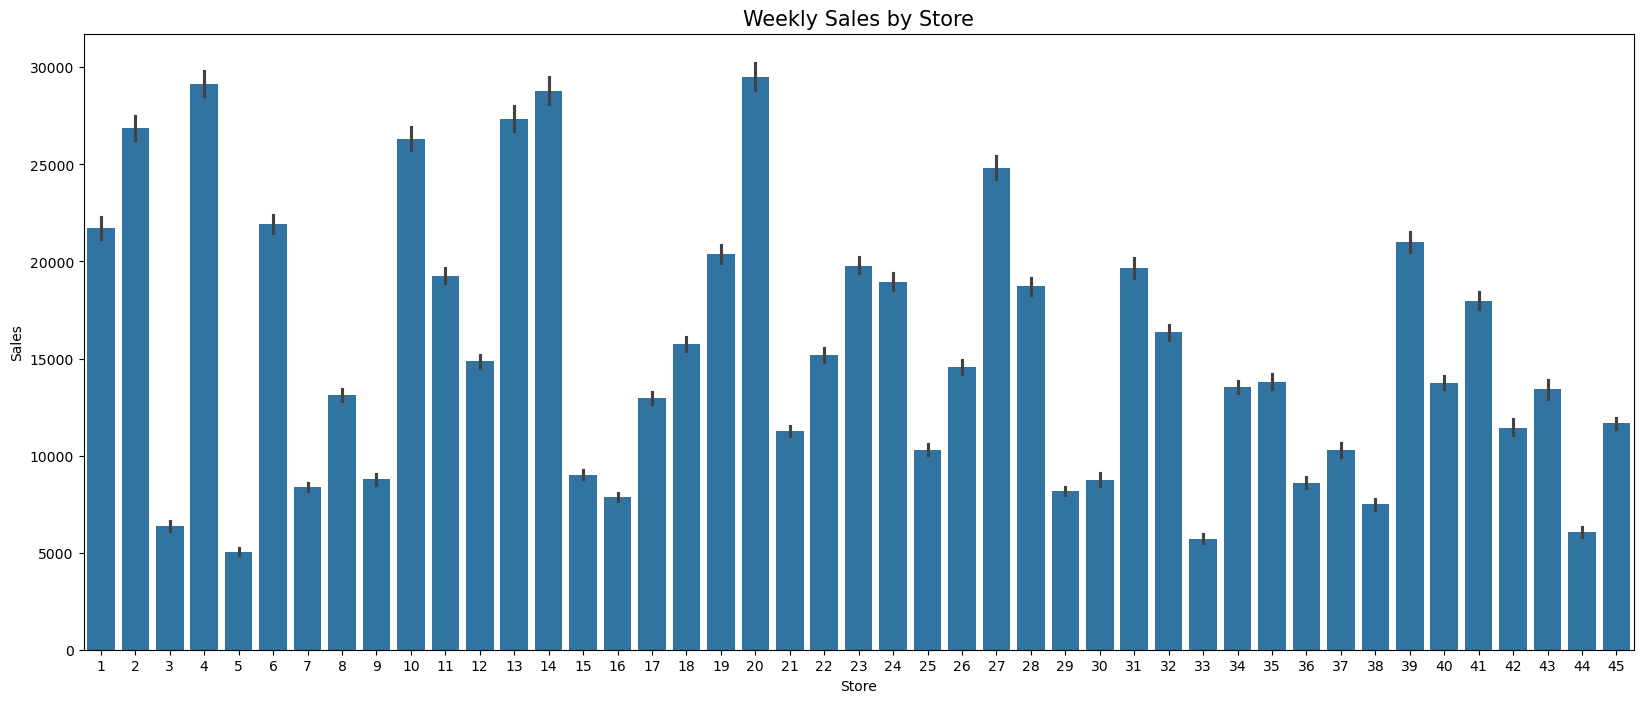

In [126]:
plt.figure(figsize =(20,8))
sns.barplot(x='Store', y='Weekly_Sales', data= dataset)
plt.title('Weekly Sales by Store', fontsize = 15)
plt.ylabel('Sales')
plt.xlabel('Store')
plt.show()

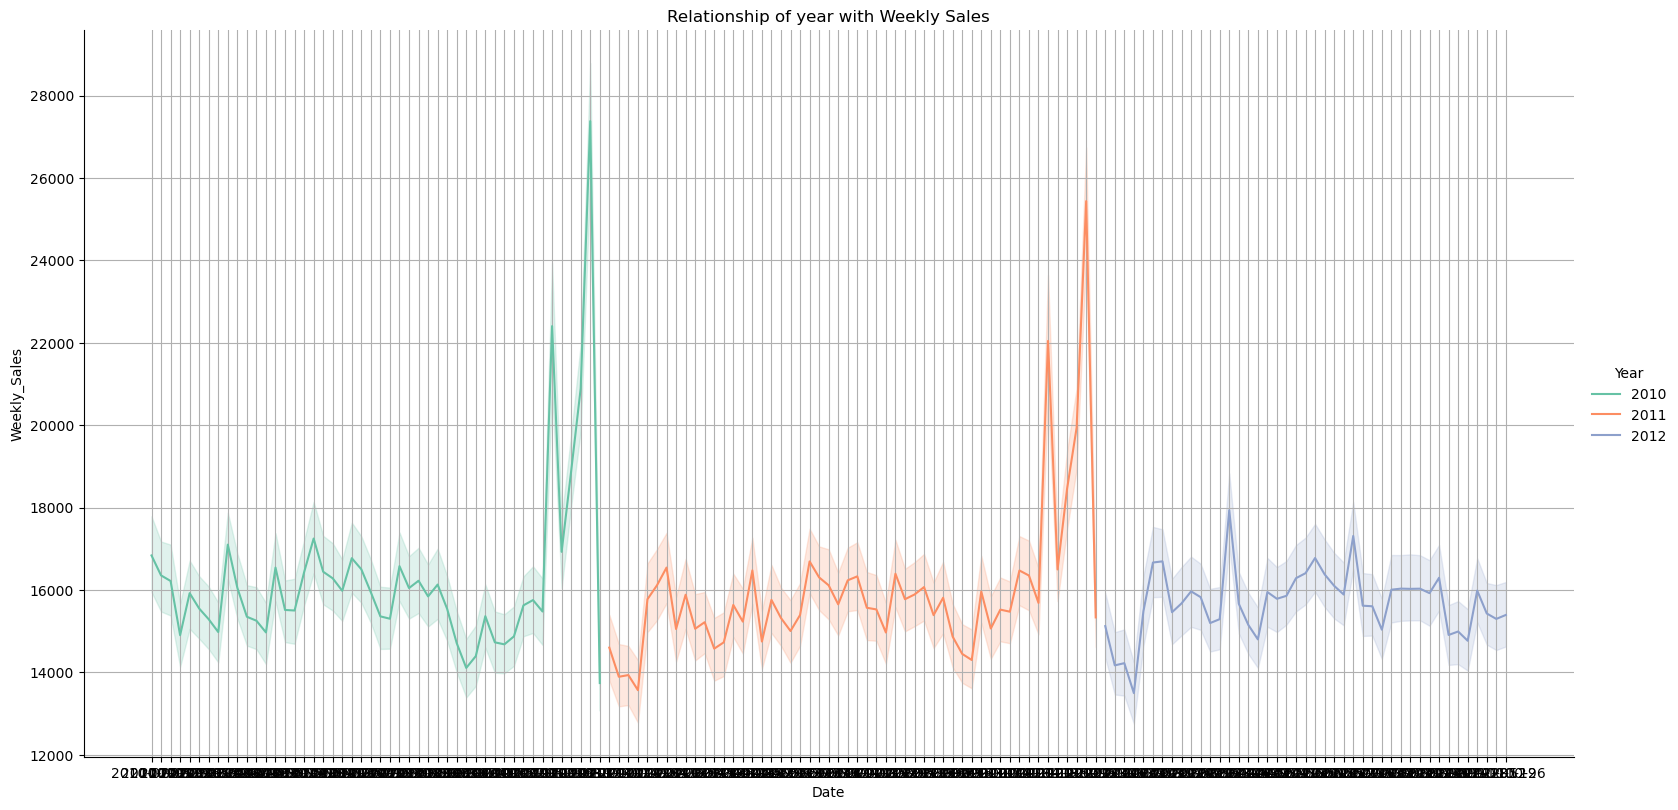

In [124]:
# This function plots the graph between categorized features and weekly_sales

def graph_relation_to_weekly_sales(col_relation, df, x='Week', palette=None):
     
    
    # Create the line plot
    sns.relplot(x=x, y='Weekly_Sales', hue=col_relation, data=df, kind='line', height=8,aspect =2 ,palette=palette)
    
    # Show the plot
    plt.title('Relationship of year with Weekly Sales')
    plt.grid(True)
    plt.show()


graph_relation_to_weekly_sales('Year', dataset, x='Date', palette='Set2')

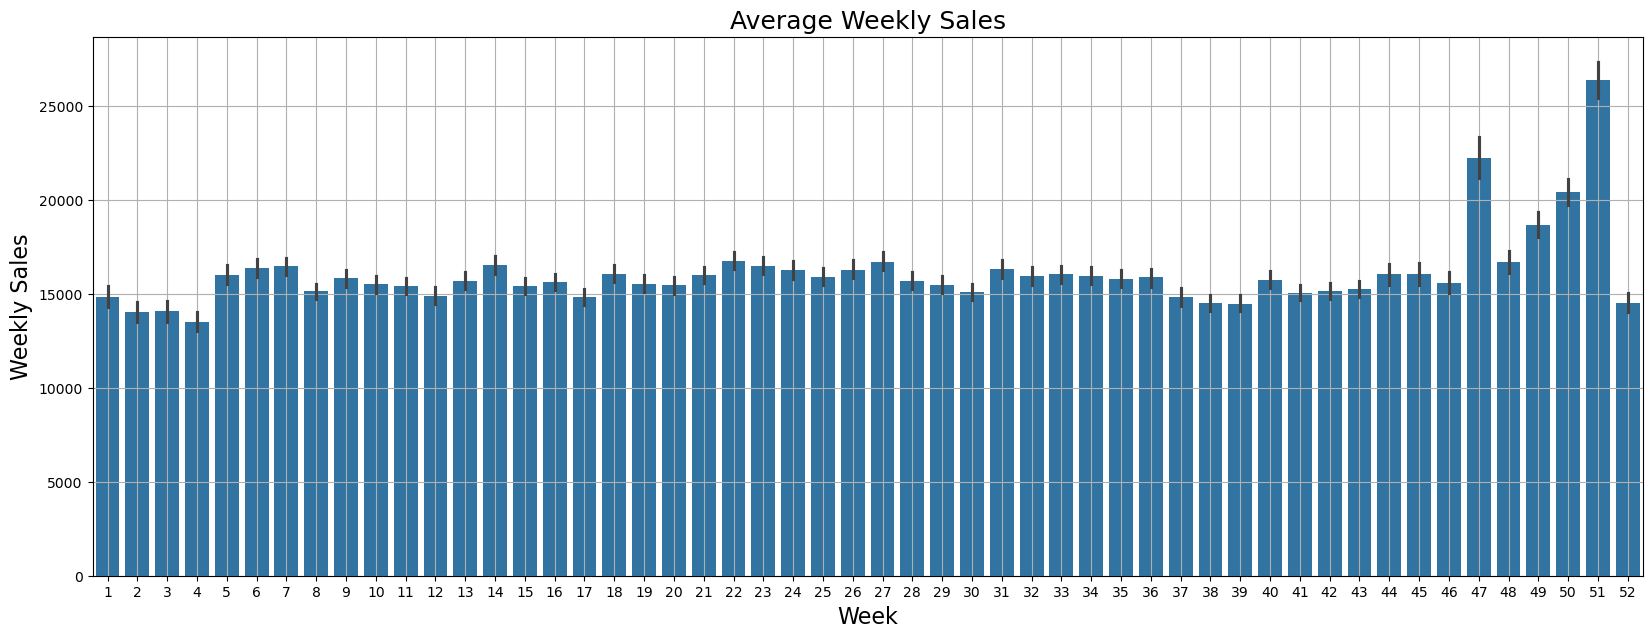

In [128]:
weekly_sales_avg = dataset.groupby('Week')['Weekly_Sales'].mean().reset_index()
plt.figure(figsize = (20, 7))
sns.barplot(x=dataset['Week'],y= dataset['Weekly_Sales'], data= weekly_sales_avg)
plt.title('Average Weekly Sales', fontsize=18)
plt.ylabel('Weekly Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.grid()
plt.show()